# Using Machine Learning To Predict Customer Lifetime Value

In [1]:
# https://www.kaggle.com/code/narendra123580/insurance-marketing-customer-value-analysis

## Customer Lifetime Value Prediction

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

Business Problem

An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more.

Project Overview

The objective of the problem is to accurately predict the Customer Lifetime Value(CLV) of the customer for an Auto Insurance Company
Performed EDA to understand the relation of target variable CLV with the other features.
Statistical Analysis techniques like OLS for numerical and Mann–Whitney U and also Kruskal Wallis test for the categorical variables were performed to find the significance of the features with respect to the target.
Supervised Regression Models like Linear Regression, Ridge Regression, Lasso Regression, DecisionTree Regression, Random Forest Regression and Adaboost Regression.
Using GridSearchCV with Random Forest Regression gave the best RMSE and R^2 score values

Dataset Description

The dataset represents Customer lifetime value of an Auto Insurance Company in the United States, it includes over 24 features and 9134 records to analyze the lifetime value of Customer.

DATASET:-
https://docs.google.com/spreadsheets/d/1cltj1nQA2hSM_-BJ2b7S1afMV78hKj9ygd4_P-Aqjqk/edit?usp=sharing 


In [2]:
#import all packages and liabraries 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

#To ignore the warnings 
import warnings
warnings.filterwarnings('ignore')

#To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



Linear Regression, 
RidgeRegression, 
LassoRegression, 
DecisionTree Regression, 
Random Forest Regression 
Adaboost Regression. 

Using GridSearchCV with Random Forest Regression gave the best RMSE and R^2 score values


# Loading the dataset

In [3]:
df=pd.read_csv("AutoInsurance.csv")

# Understanding the data

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,10/1/2011,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


In [8]:
#Checking missing values
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### No missing values

In [9]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [10]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


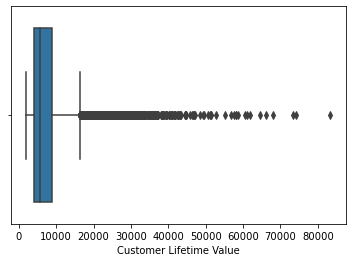

None
AxesSubplot(0.125,0.125;0.775x0.755)


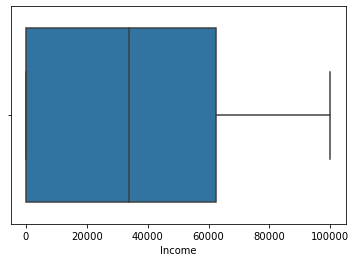

None
AxesSubplot(0.125,0.125;0.775x0.755)


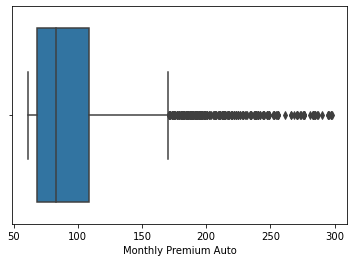

None
AxesSubplot(0.125,0.125;0.775x0.755)


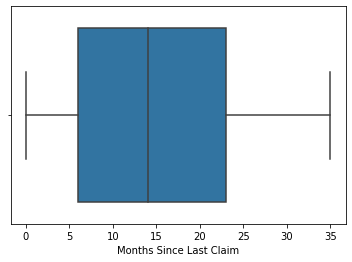

None
AxesSubplot(0.125,0.125;0.775x0.755)


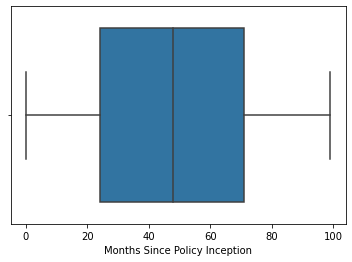

None
AxesSubplot(0.125,0.125;0.775x0.755)


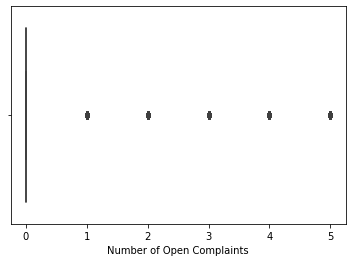

None
AxesSubplot(0.125,0.125;0.775x0.755)


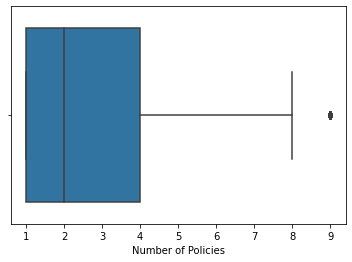

None
AxesSubplot(0.125,0.125;0.775x0.755)


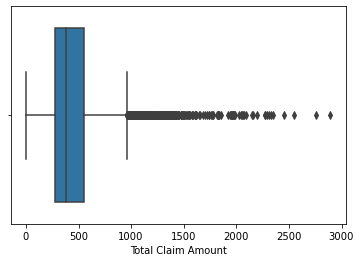

None


In [11]:
# Selecting only numerical data to check wheather there are any outliers
for i in df.select_dtypes("number").columns:
    print(sns.boxplot(x=df[i],data=df))
    print(plt.show())

#### 1. As we can see that there are outliers in the 'total claim amount' and also in 'monthly premium auto' , usually we remove the outliers for a better model.
#### 2. since our dataset is related to insurance and banking industry, we must be accept the outliers,as they can be our potential customers.
#### 3. And there are no outliers in the income.
#### 4. Conclusion: No outlier treatment required.

In [12]:
#Checking skewness in data
df.skew().sort_values(ascending=False)

Customer Lifetime Value          3.032280
Number of Open Complaints        2.783263
Monthly Premium Auto             2.123546
Total Claim Amount               1.714966
Number of Policies               1.253333
Income                           0.286887
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
dtype: float64

#### We can see data is skewed in features "Customer Lifetime Value", "Number of Open Complaints","Monthly Premium Auto" and "Response" 

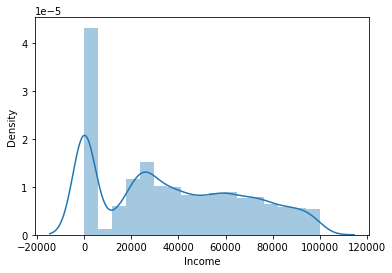

In [13]:
sns.distplot(df['Income'])
plt.show()

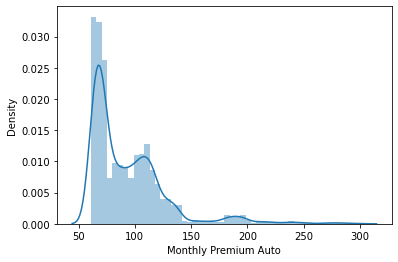

In [14]:
sns.distplot(df['Monthly Premium Auto'])
plt.show()

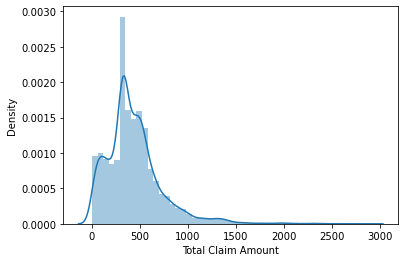

In [15]:
sns.distplot(df['Total Claim Amount'])
plt.show()

##### As we can see that none of the continuous variables are normally distributed. 
##### So in our case , we want to make the distributions normal, we can apply some 
##### transformations to the data and see if we can achieve a normally distributed variable.

In [16]:
# TRANSFORMATION OF THE NUMERICAL VARIABLES

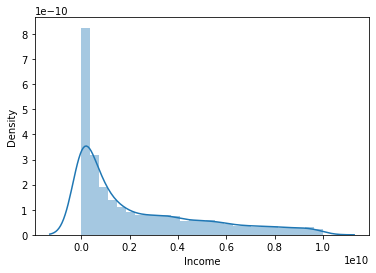

In [17]:
sns.distplot(df['Income']**2)
plt.show()

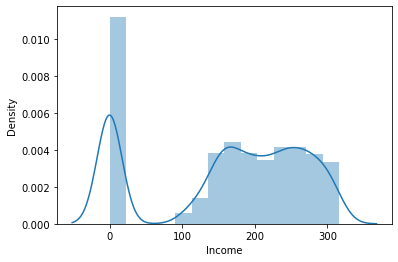

In [18]:
sns.distplot(df['Income']**(1/2))
plt.show()

In [19]:
# As we can see that while we are trying to transform the data to make it normal,
# rather the distribution is getting skewed, or is having multiple peaks which again 
# is a problem to our model, hence we just stick with the same distribution of the variable.

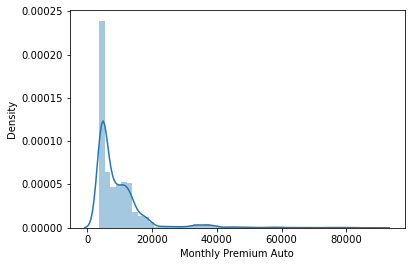

In [20]:
sns.distplot(df['Monthly Premium Auto']**(2))
plt.show()

In [21]:
# The monthly premium auto has multiple peaks,so to remove those peaks we can apply any 
# of the power transformation (SQUARE / CUBE) but as we can see that after the square transformation 
# the data is getting heavily skewed, so we stick with the actual distribution again.

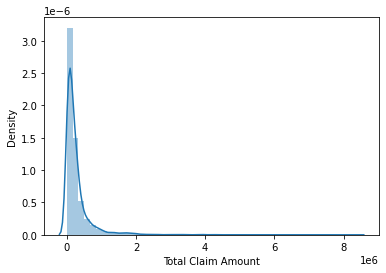

In [22]:
sns.distplot(df['Total Claim Amount']**2)
plt.show()

In [23]:
#' Again for the total claim amount after applying the transformation's the data is getting skewed, 
#' and hence we stick to the actual distibution of the data. 
#' Conclusion: No matter what power transformation we are applying to the numerical variables, 
#' it is still not getting normally distributed, and moreover the data is getting skewed, 
#' so rather we will just stick with the actual distribution

In [24]:
# Selecting only categorical data and assigning it into ObjectData
ObjectData=df.select_dtypes("object")

In [25]:
ObjectData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [26]:
ObjectData.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [27]:
ObjectData.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
ObjectData.drop(['Customer','Effective To Date'],axis=1,inplace=True)

In [29]:
for i in ObjectData.columns:
    print(ObjectData[i].value_counts(),"\n")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

No     7826
Yes    1308
Name: Response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64 

F    4658
M    4476
Name: Gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Cor

## Univariate data visulization

AxesSubplot(0.125,0.125;0.775x0.755)


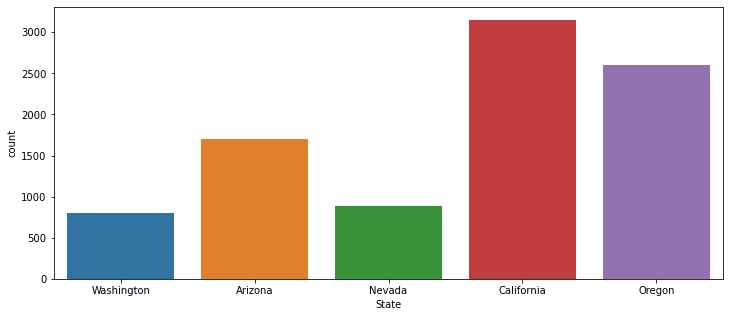

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


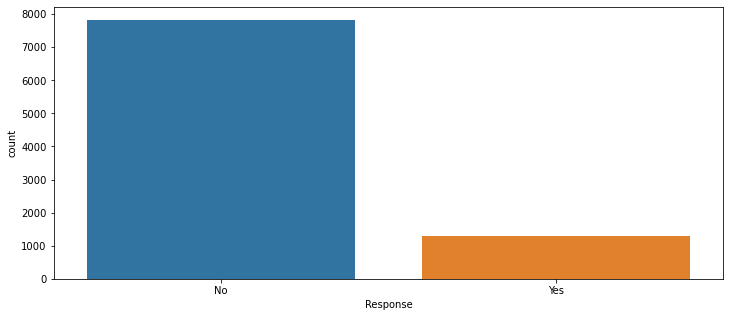

None
No     7826
Yes    1308
Name: Response, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


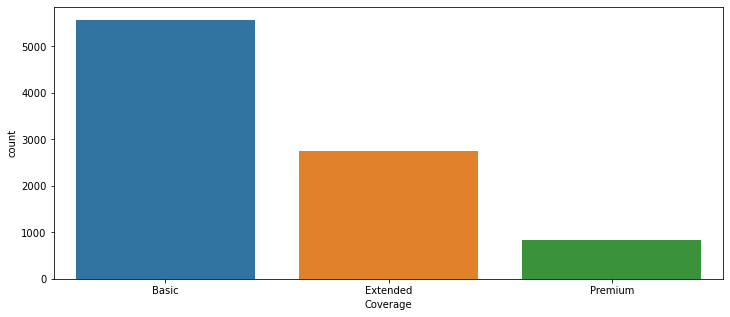

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


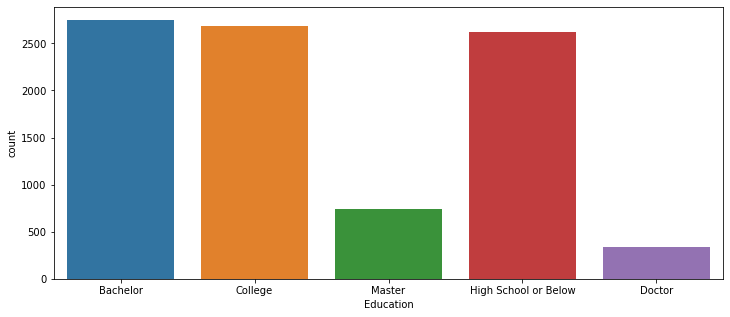

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


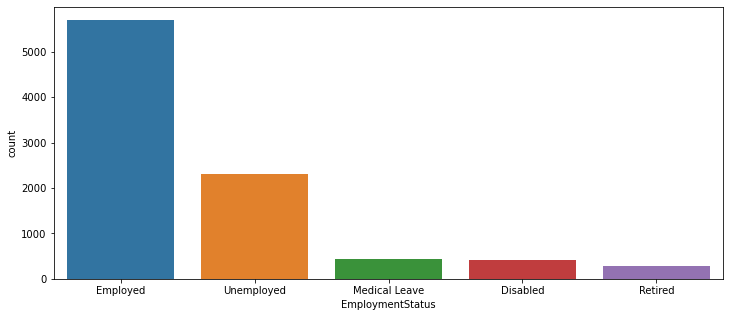

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


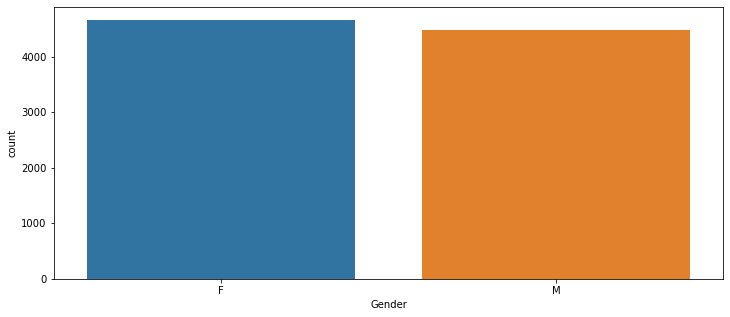

None
F    4658
M    4476
Name: Gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


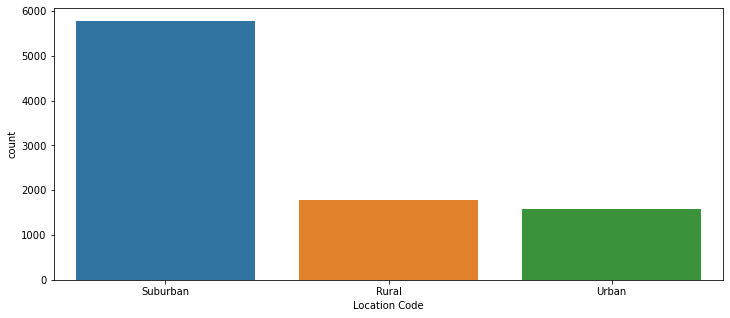

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


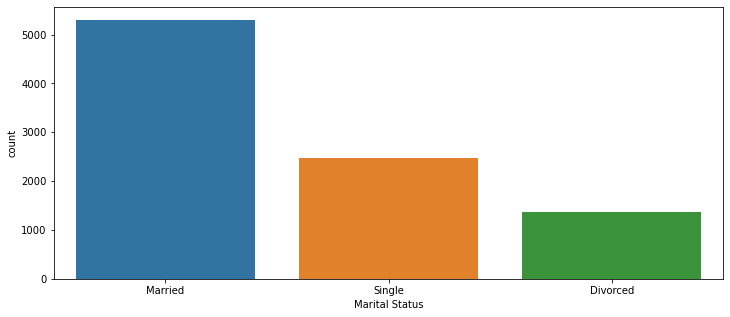

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


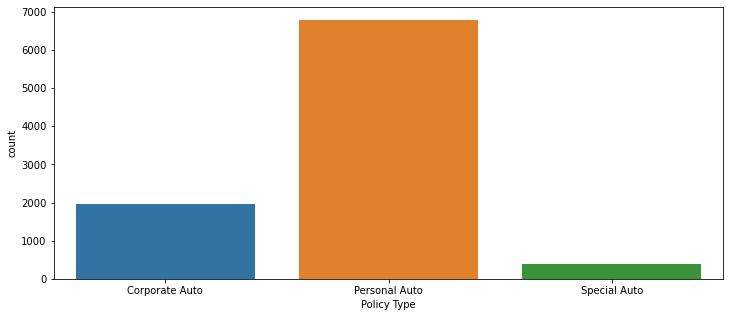

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


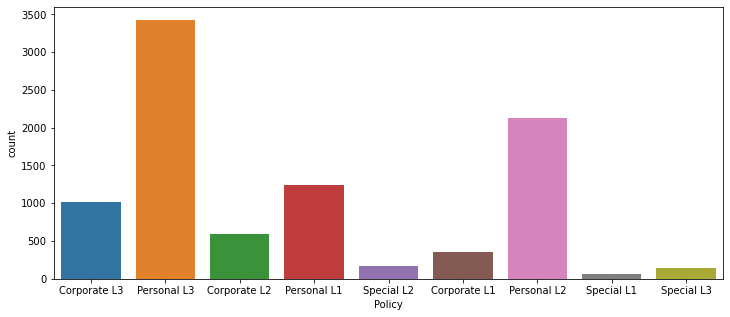

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


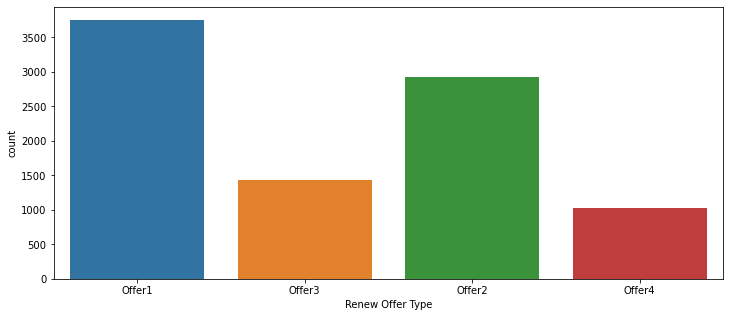

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


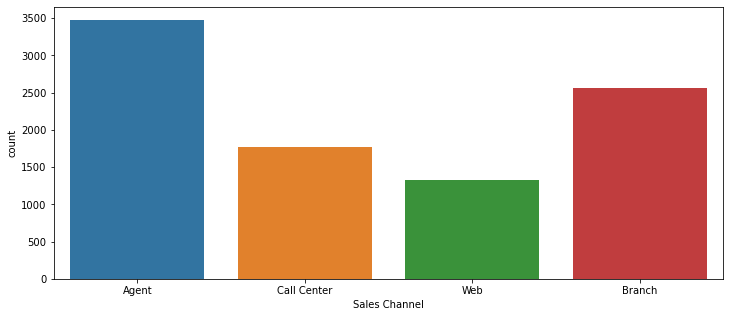

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


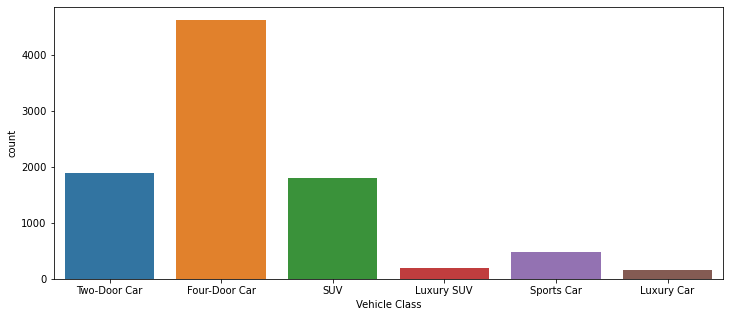

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


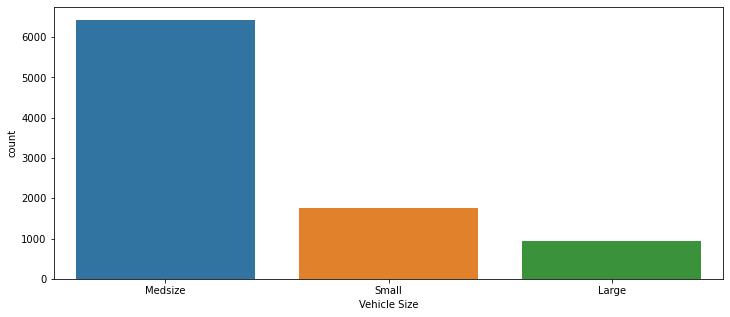

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [30]:
for i in ObjectData.columns:
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

## Bivariate Data Visualization 

AxesSubplot(0.125,0.125;0.775x0.755)


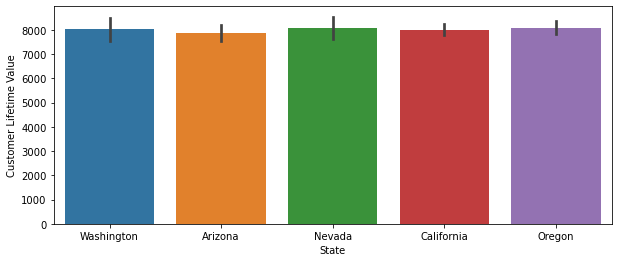

None
AxesSubplot(0.125,0.125;0.775x0.755)


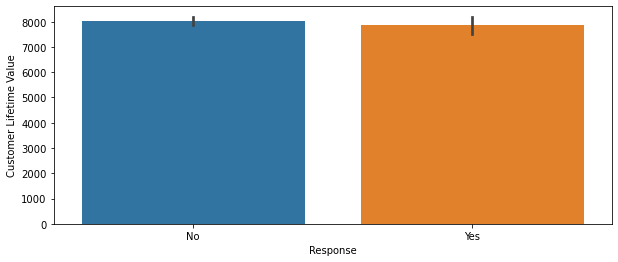

None
AxesSubplot(0.125,0.125;0.775x0.755)


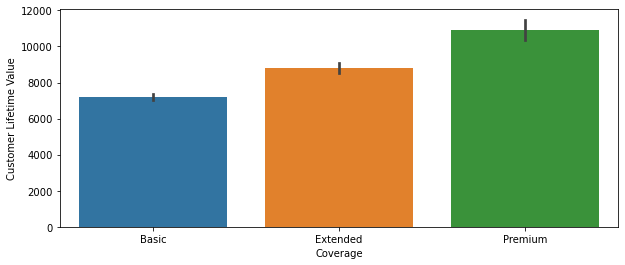

None
AxesSubplot(0.125,0.125;0.775x0.755)


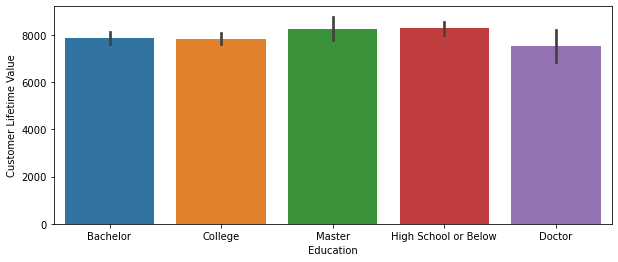

None
AxesSubplot(0.125,0.125;0.775x0.755)


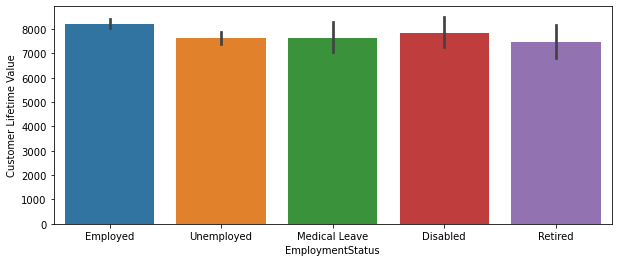

None
AxesSubplot(0.125,0.125;0.775x0.755)


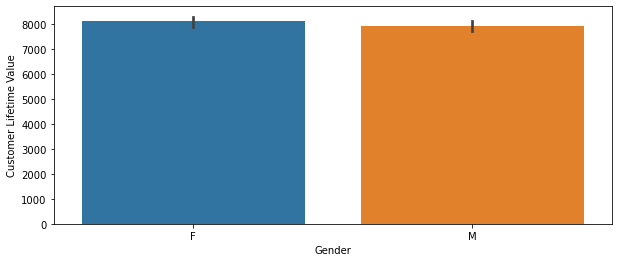

None
AxesSubplot(0.125,0.125;0.775x0.755)


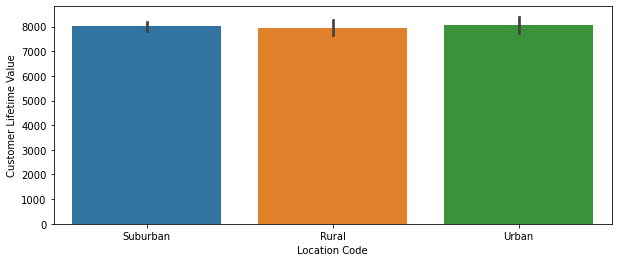

None
AxesSubplot(0.125,0.125;0.775x0.755)


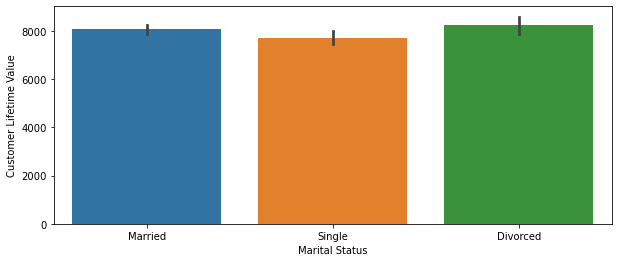

None
AxesSubplot(0.125,0.125;0.775x0.755)


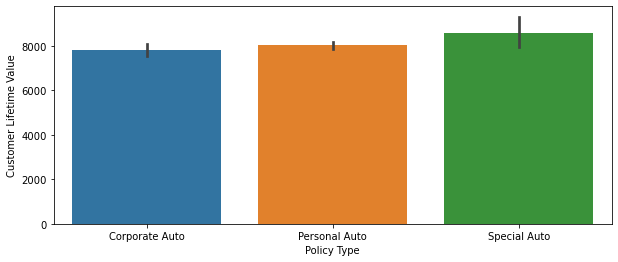

None
AxesSubplot(0.125,0.125;0.775x0.755)


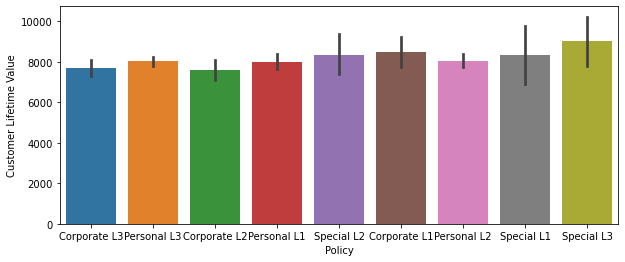

None
AxesSubplot(0.125,0.125;0.775x0.755)


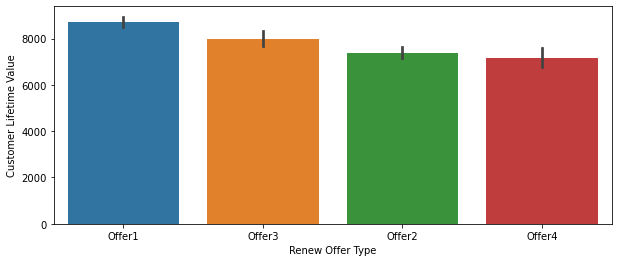

None
AxesSubplot(0.125,0.125;0.775x0.755)


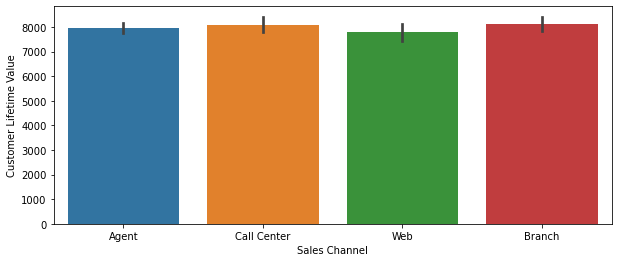

None
AxesSubplot(0.125,0.125;0.775x0.755)


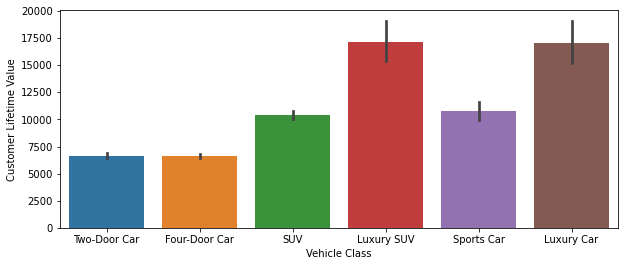

None
AxesSubplot(0.125,0.125;0.775x0.755)


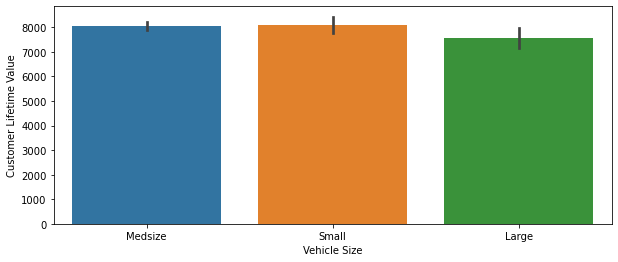

None


In [31]:
for i in ObjectData.columns:
    plt.figure(figsize=(10, 4))
    print(sns.barplot(x=ObjectData[i],y=df['Customer Lifetime Value'], data=ObjectData))
    print(plt.show())
    

In [32]:
# Inferance

# 1. We can see that the average customer lifetime value is same for both male and female.


AxesSubplot(0.125,0.125;0.775x0.755)


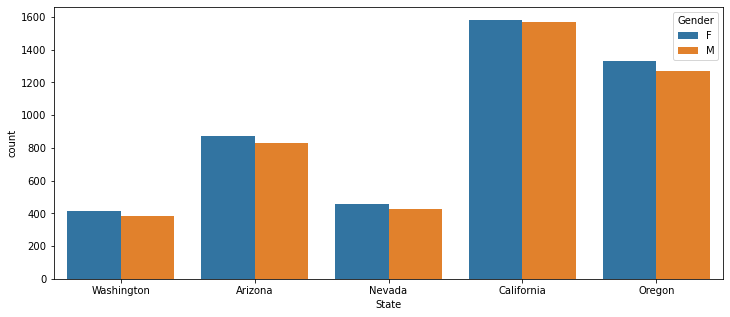

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


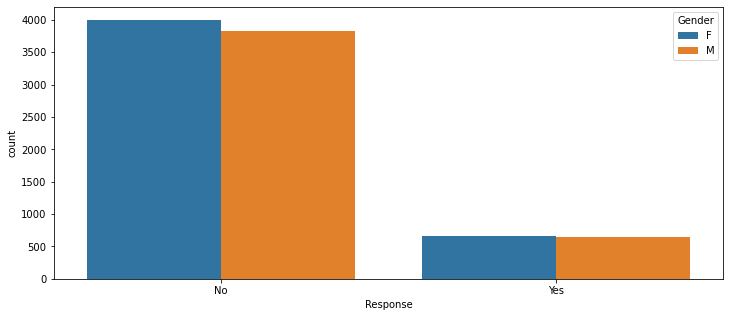

None
No     7826
Yes    1308
Name: Response, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


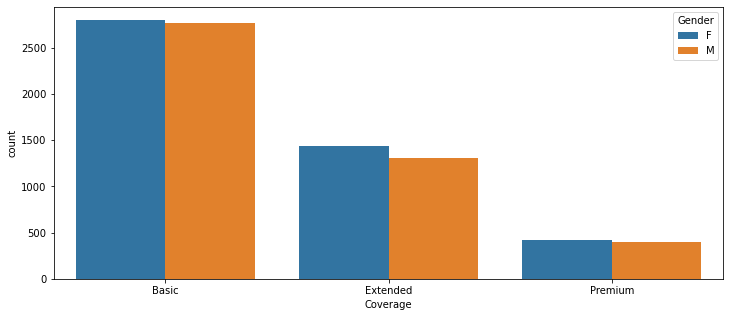

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


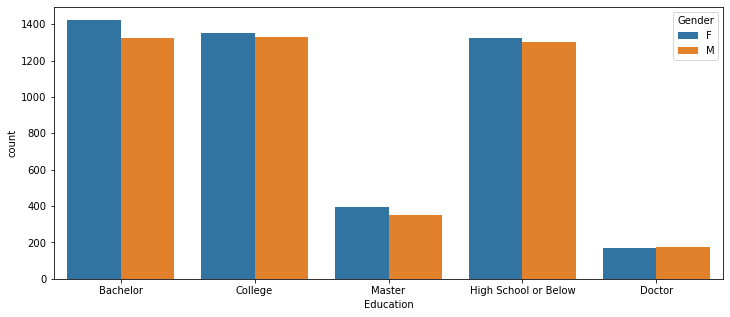

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


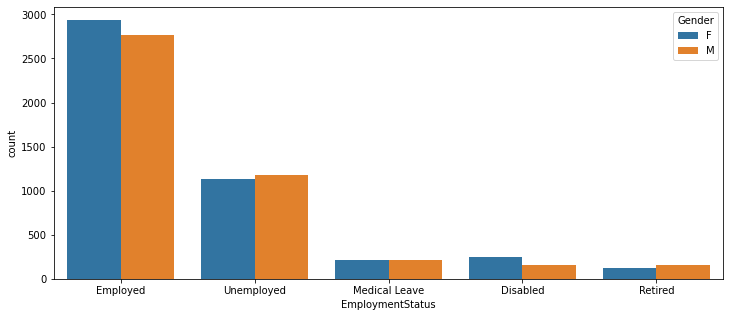

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


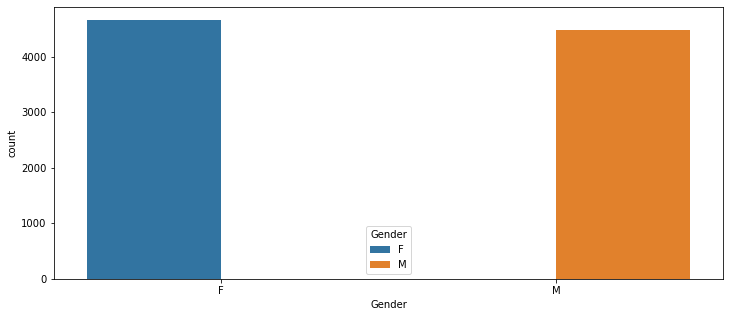

None
F    4658
M    4476
Name: Gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


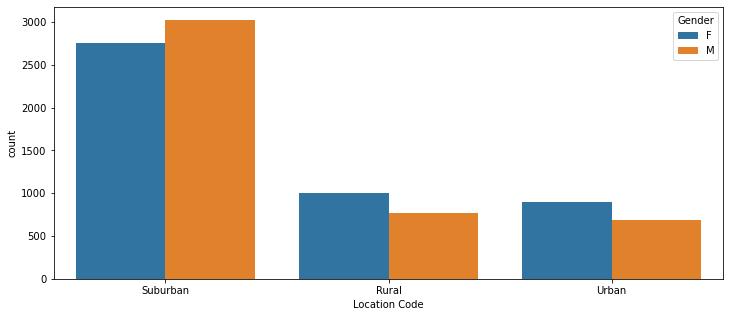

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


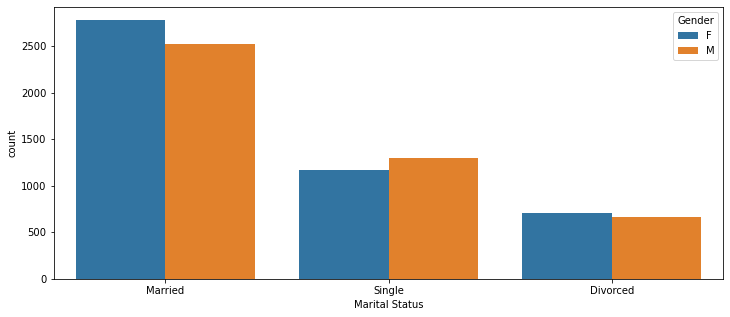

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


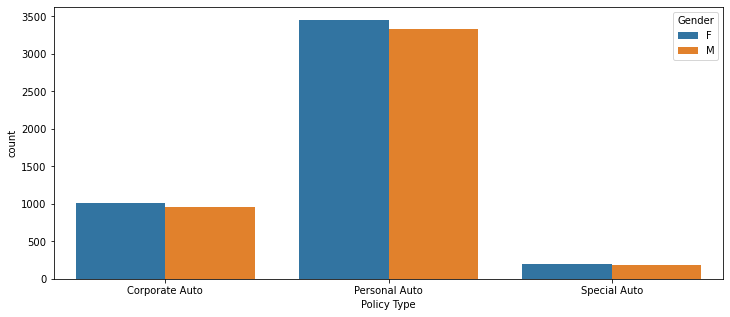

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


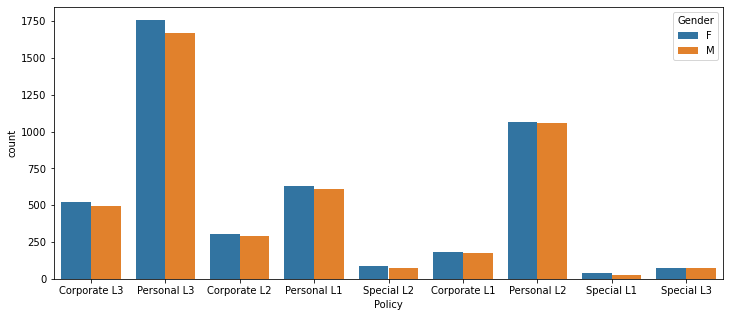

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


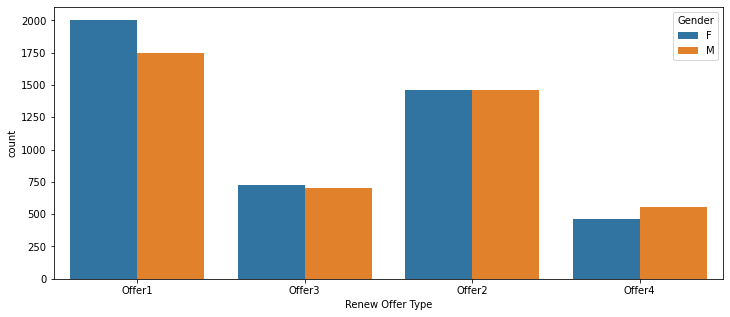

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


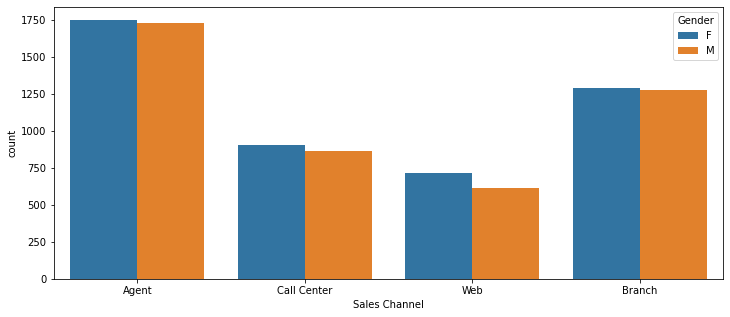

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


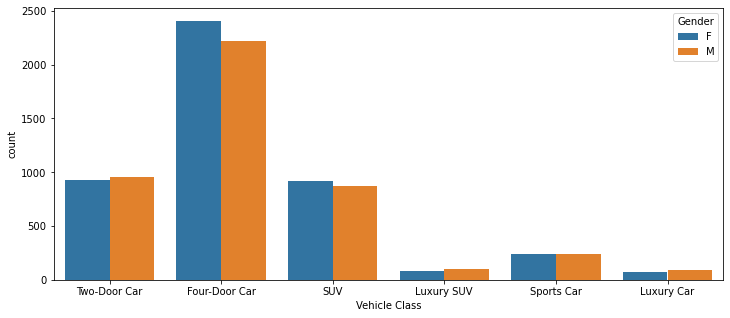

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


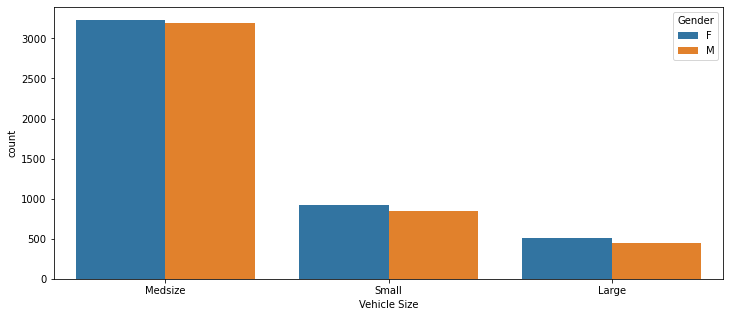

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [33]:
for i in ObjectData.columns:
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],hue=ObjectData['Gender'],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

AxesSubplot(0.125,0.125;0.775x0.755)


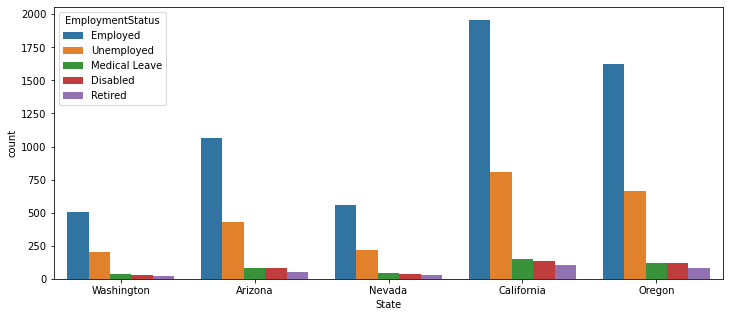

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


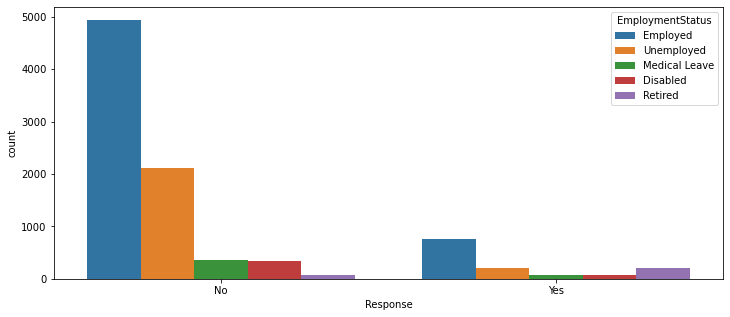

None
No     7826
Yes    1308
Name: Response, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


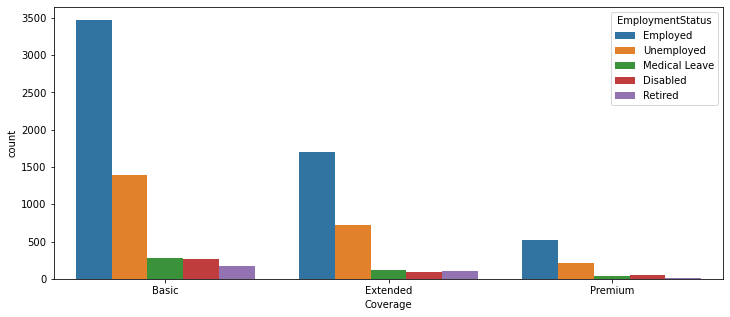

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


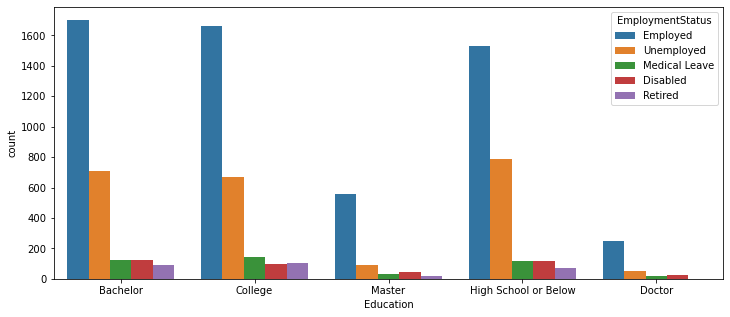

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


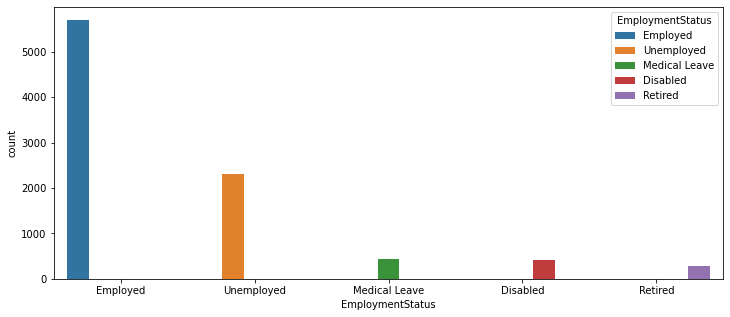

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


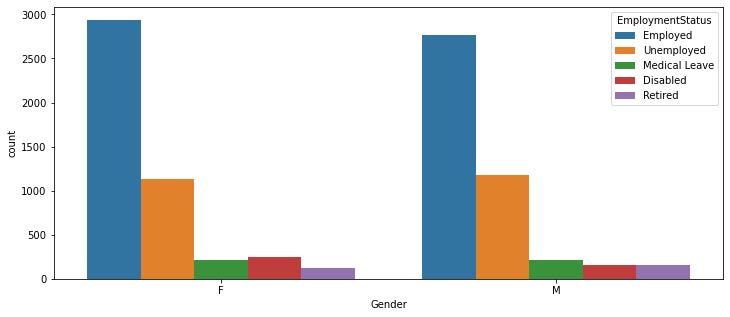

None
F    4658
M    4476
Name: Gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


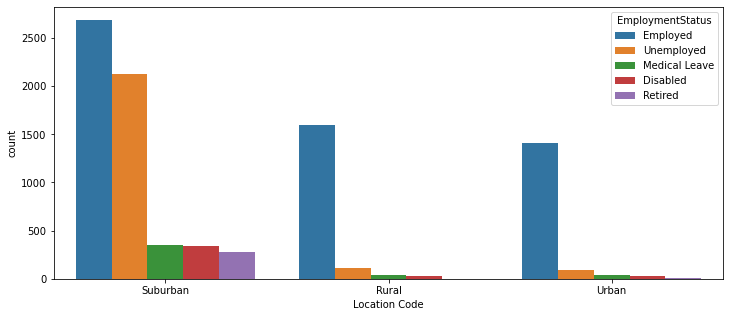

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


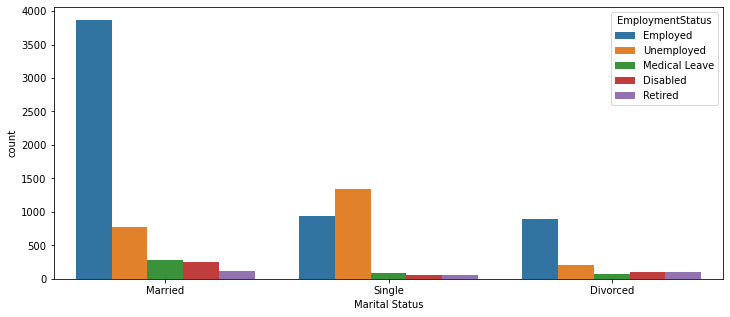

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


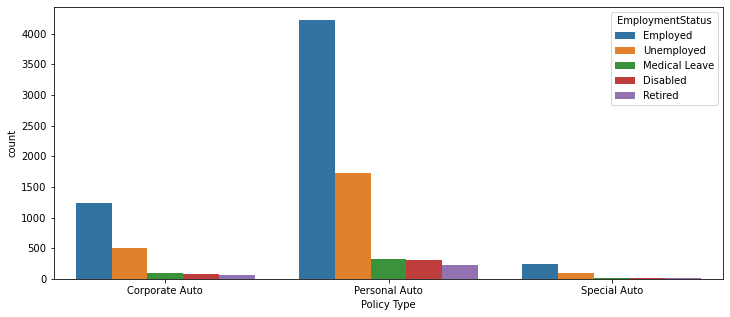

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


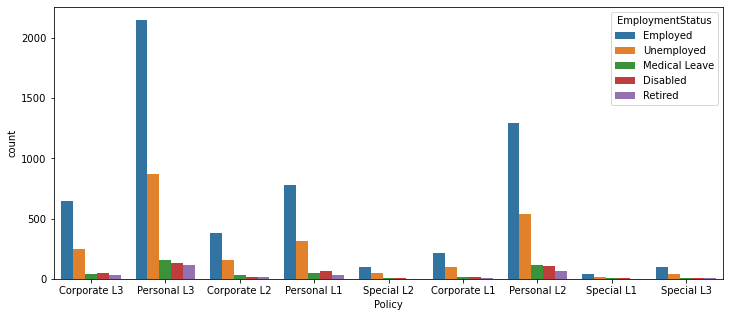

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


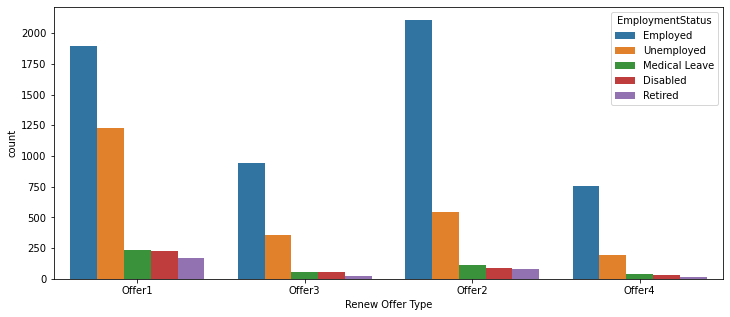

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


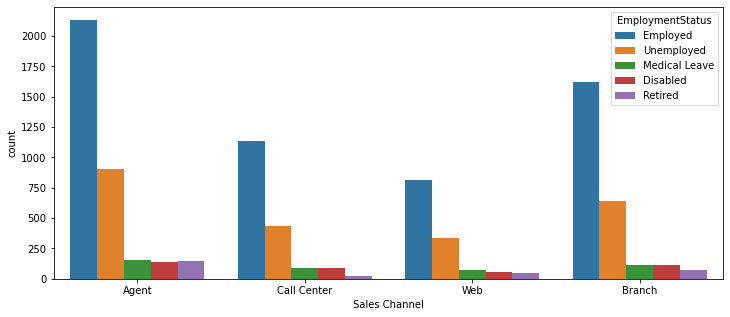

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


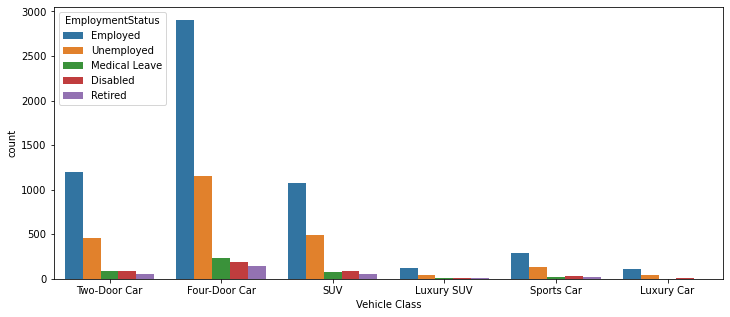

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


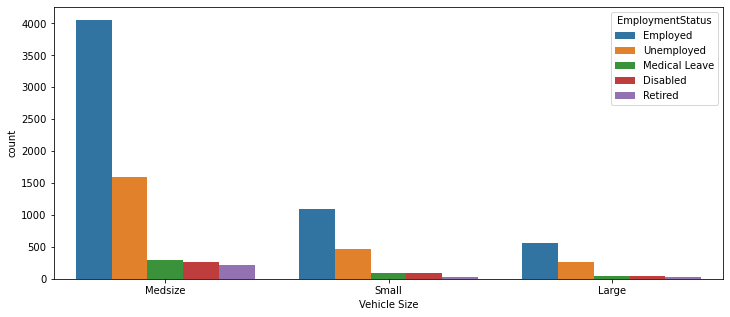

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [34]:
for i in ObjectData.columns:
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],hue=ObjectData['EmploymentStatus'],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

AxesSubplot(0.125,0.125;0.775x0.755)


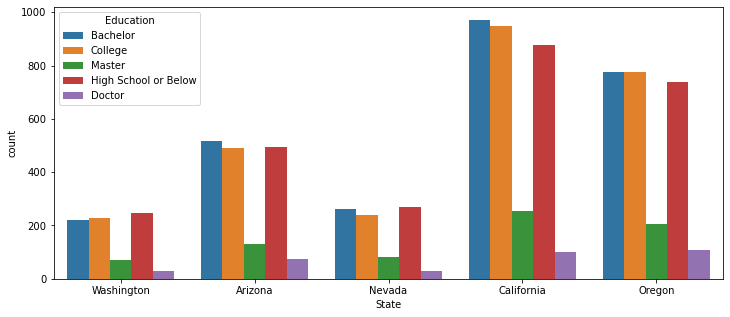

None
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


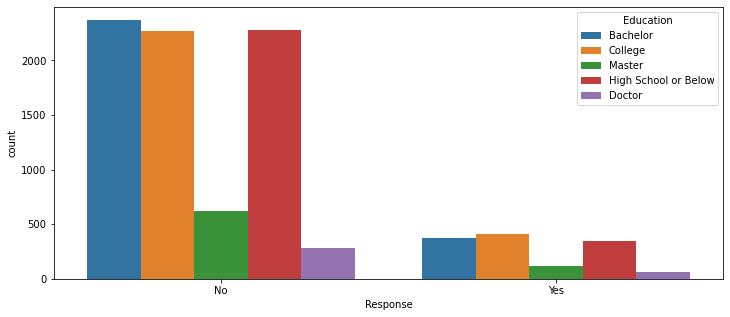

None
No     7826
Yes    1308
Name: Response, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


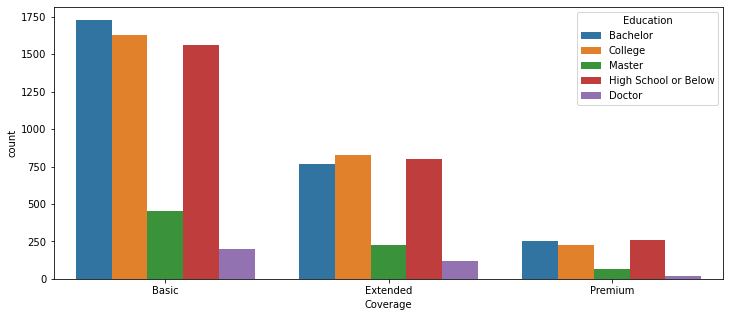

None
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


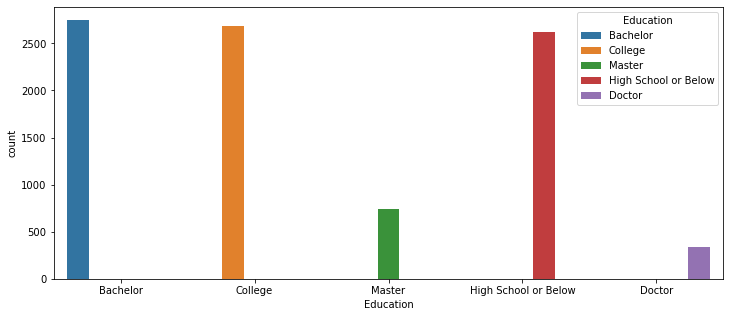

None
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


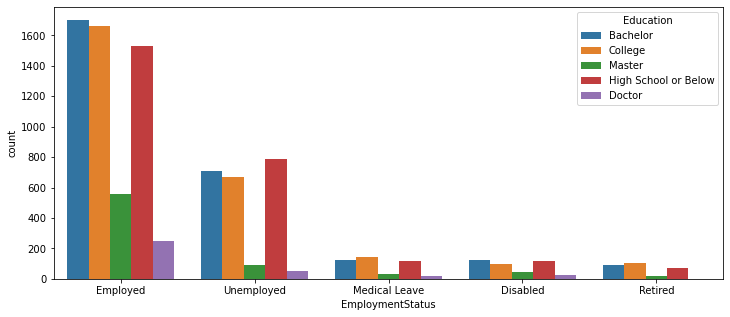

None
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


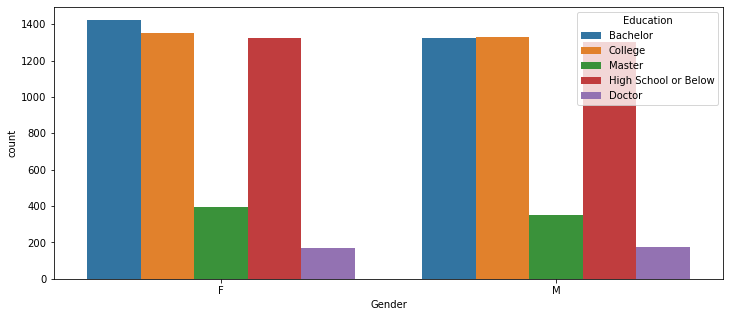

None
F    4658
M    4476
Name: Gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


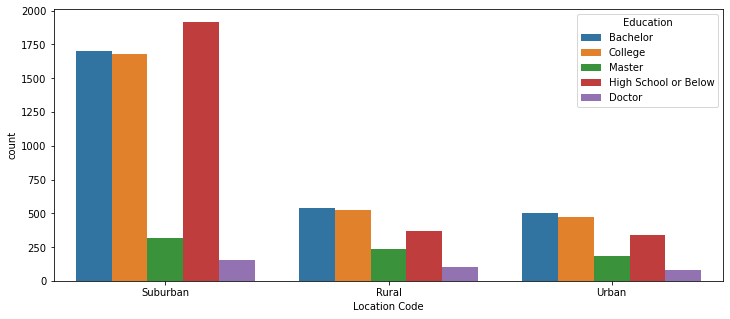

None
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


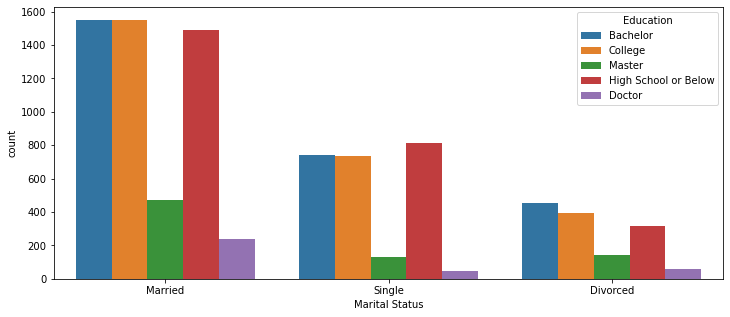

None
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


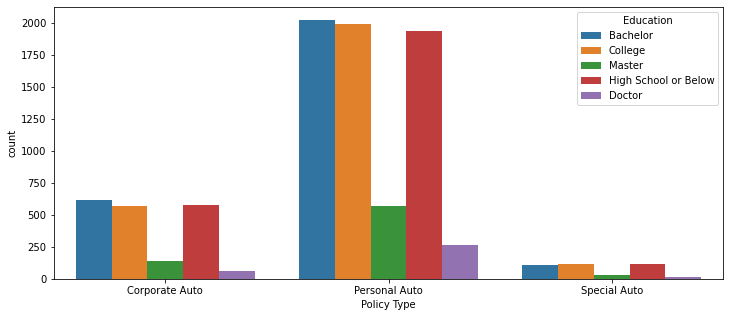

None
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


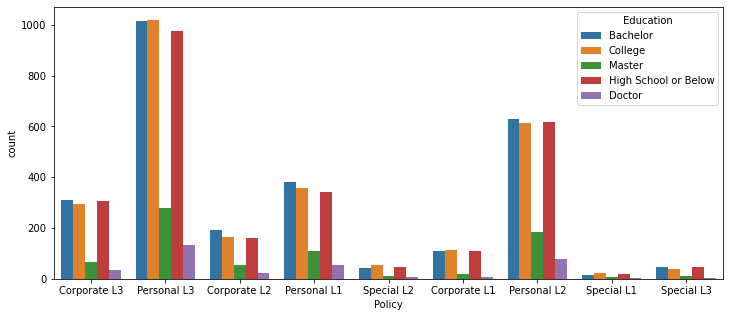

None
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


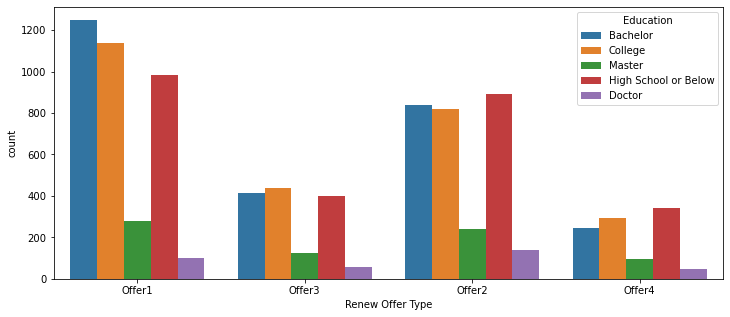

None
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


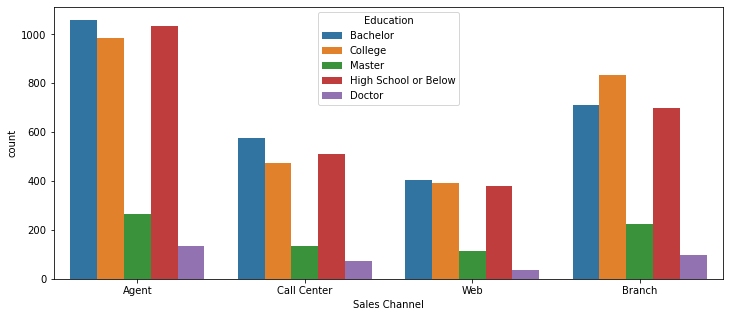

None
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


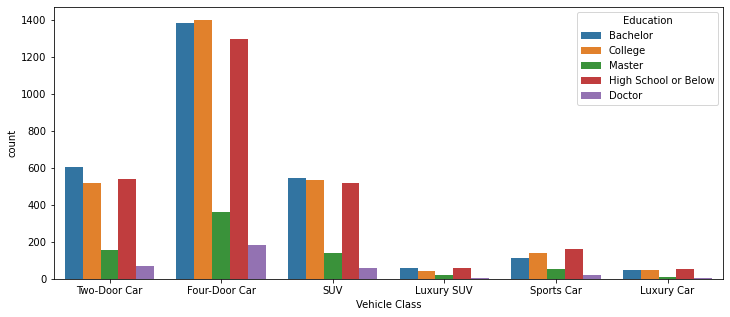

None
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


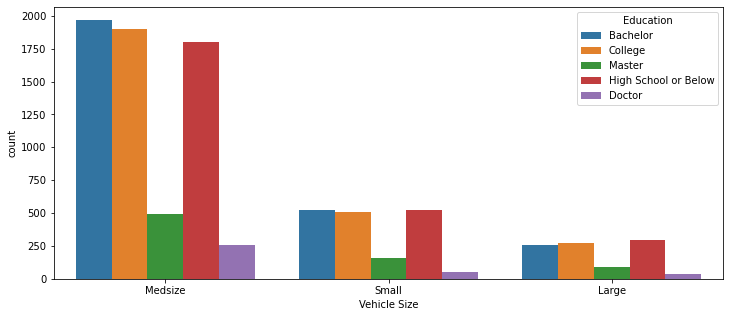

None
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [35]:
for i in ObjectData.columns:
    sorted(ObjectData[i])
    plt.figure(figsize=(12, 5))
    print(sns.countplot(x=ObjectData[i],hue=ObjectData['Education'],data=ObjectData))
    print(plt.show())
    
    print(ObjectData[i].value_counts())

In [36]:
# for i in df.select_dtypes('object').columns:
#    print(sns.scatterplot(x=df[i],y=df['Customer Lifetime Value'],data=df))
#    print(plt.show())

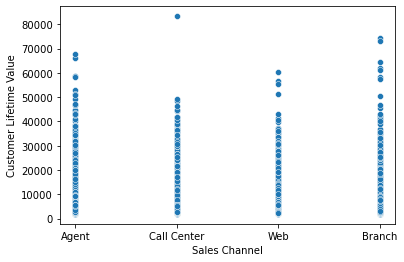

In [37]:
sns.scatterplot(x=df['Sales Channel'],y=df['Customer Lifetime Value'],data=df)
plt.show()

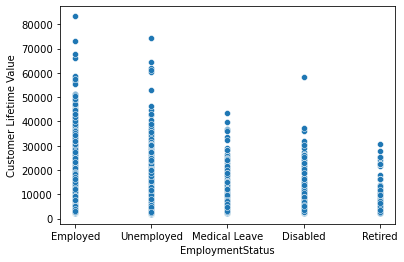

In [38]:
sns.scatterplot(x=df['EmploymentStatus'],y=df['Customer Lifetime Value'],data=df)
plt.show()

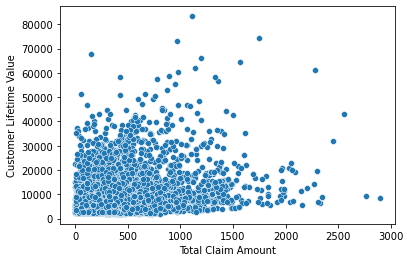

In [39]:
sns.scatterplot(x=df['Total Claim Amount'],y=df['Customer Lifetime Value'],data=df)
plt.show()

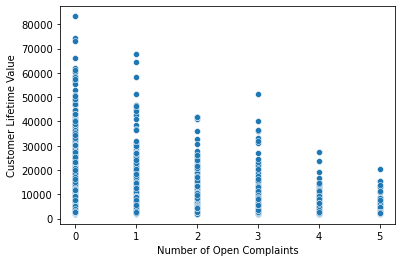

In [40]:
sns.scatterplot(x=df['Number of Open Complaints'],y=df['Customer Lifetime Value'],data=df)
plt.show()

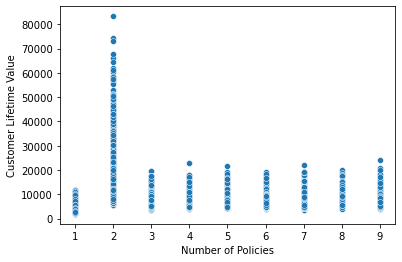

In [41]:
sns.scatterplot(x=df['Number of Policies'],y=df['Customer Lifetime Value'],data=df)
plt.show()

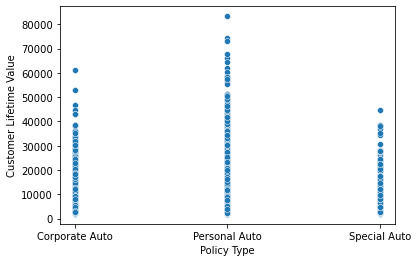

In [42]:
sns.scatterplot(x=df['Policy Type'],y=df['Customer Lifetime Value'],data=df)
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

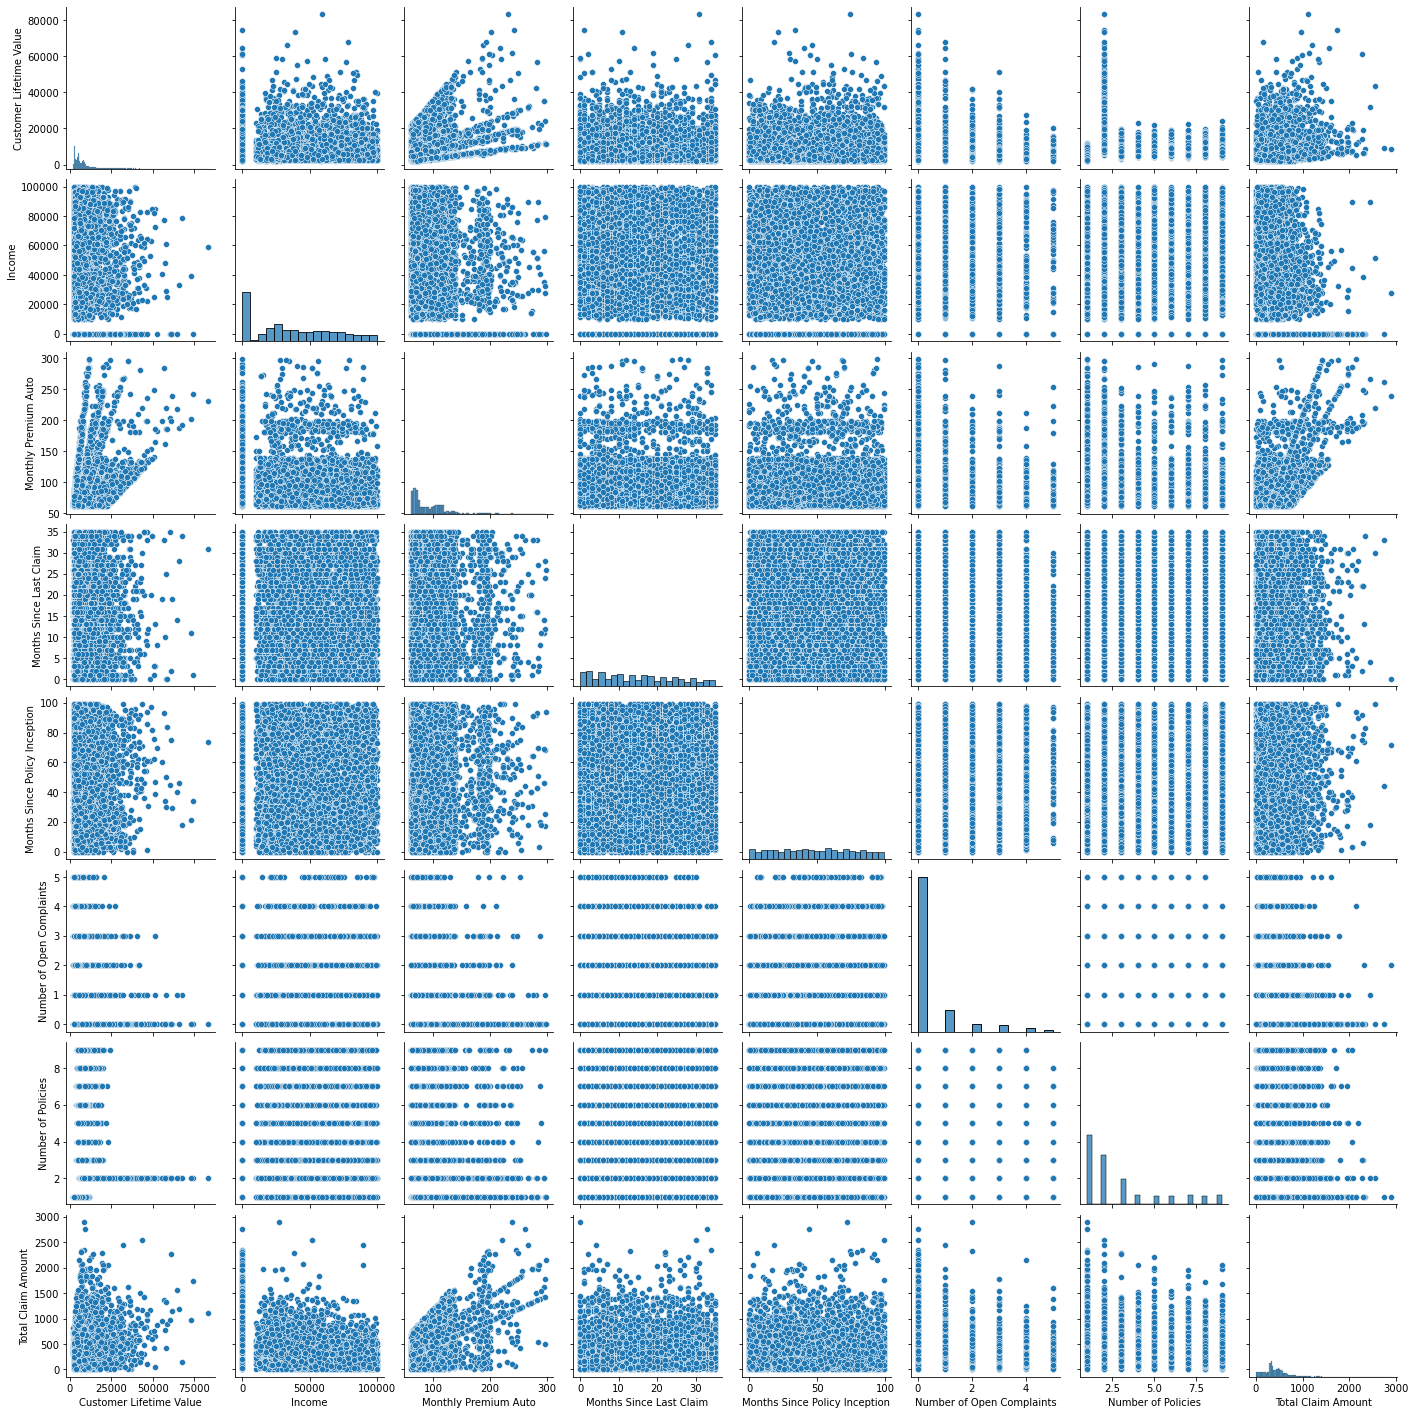

In [44]:
#Pairplot
sns.pairplot(df)
plt.show()

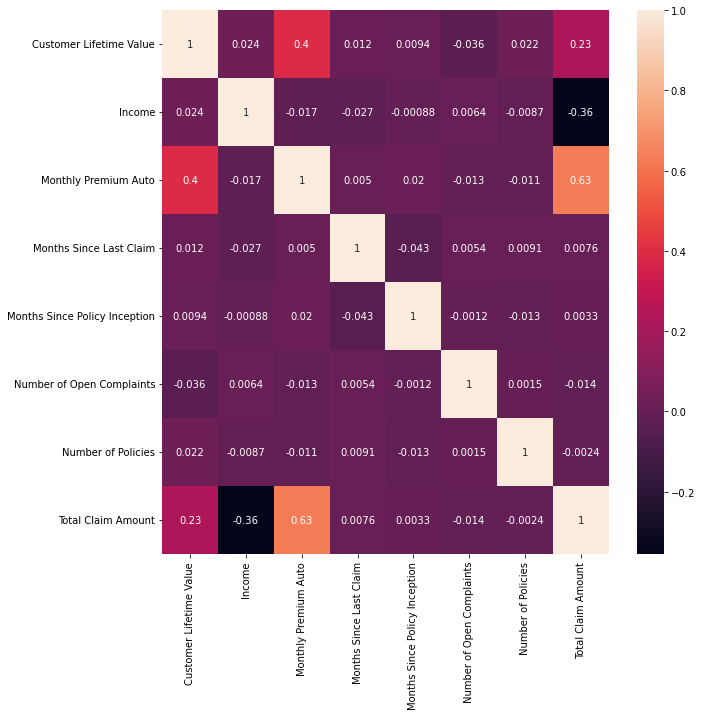

In [45]:
#Correlation between numeric feature
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### And we can clearly see in the correlation map, that customer lifetime value has a 
#### better correlation with monthly premium auto and acceptable co relation with total claim amount,
#### but it show's no relationship with income, so again with all the visualization's 
#### we can come to the conclusion that we can dis regard the INCOME feature.

### Droping the insignificant column

In [46]:
df.drop(['Customer'],axis=1,inplace=True)

### Preprocessing Label Encoding

In [47]:
# Import label encoder 
from sklearn.preprocessing import  LabelEncoder
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = LabelEncoder() 
  

In [48]:
#Selecting only 'Object' feature
df.select_dtypes('object').columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Encoding all the categorical features

In [49]:
for i in df.select_dtypes('object').columns:
    print("Before encoding the unique values of feature:", i)
    print(df[i].value_counts(),"\n\n")
    
    # Encode labels in column i
    df[i]= label_encoder.fit_transform(df[i]) 
    print("After encoding the unique values  of feature:", i)
    
    print(df[i].value_counts(),"\n\n")

Before encoding the unique values of feature: State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 


After encoding the unique values  of feature: State
1    3150
3    2601
0    1703
2     882
4     798
Name: State, dtype: int64 


Before encoding the unique values of feature: Response
No     7826
Yes    1308
Name: Response, dtype: int64 


After encoding the unique values  of feature: Response
0    7826
1    1308
Name: Response, dtype: int64 


Before encoding the unique values of feature: Coverage
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 


After encoding the unique values  of feature: Coverage
0    5568
1    2742
2     824
Name: Coverage, dtype: int64 


Before encoding the unique values of feature: Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dt

### Converding the date feature in Day, Month and Year Columns

In [50]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [51]:
df['Effective To Date'].head()

0   1970-01-01 00:00:00.000000040
1   1970-01-01 00:00:00.000000020
2   1970-01-01 00:00:00.000000034
3   1970-01-01 00:00:00.000000009
4   1970-01-01 00:00:00.000000046
Name: Effective To Date, dtype: datetime64[ns]

In [52]:
df['Year'] = df['Effective To Date'].dt.strftime('%Y')
df['Month'] = df['Effective To Date'].dt.strftime('%m')


In [53]:
df['Date'] = df['Effective To Date'].dt.strftime('%d')

In [54]:
df['Date'].head()

0    01
1    01
2    01
3    01
4    01
Name: Date, dtype: object

In [55]:
df['Month'].head()

0    01
1    01
2    01
3    01
4    01
Name: Month, dtype: object

In [56]:
df['Year'].head()

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Year, dtype: object

In [57]:
df.drop(['Effective To Date'],axis=1,inplace=True)

In [58]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Year,Month,Date
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1,1970,01,01
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1,1970,01,01
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1,1970,01,01
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1,1970,01,01
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1,1970,01,01


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int32  
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   int32  
 3   Coverage                       9134 non-null   int32  
 4   Education                      9134 non-null   int32  
 5   EmploymentStatus               9134 non-null   int32  
 6   Gender                         9134 non-null   int32  
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   int32  
 9   Marital Status                 9134 non-null   int32  
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [60]:
#Now all values are in numerical formate and its ready for the training

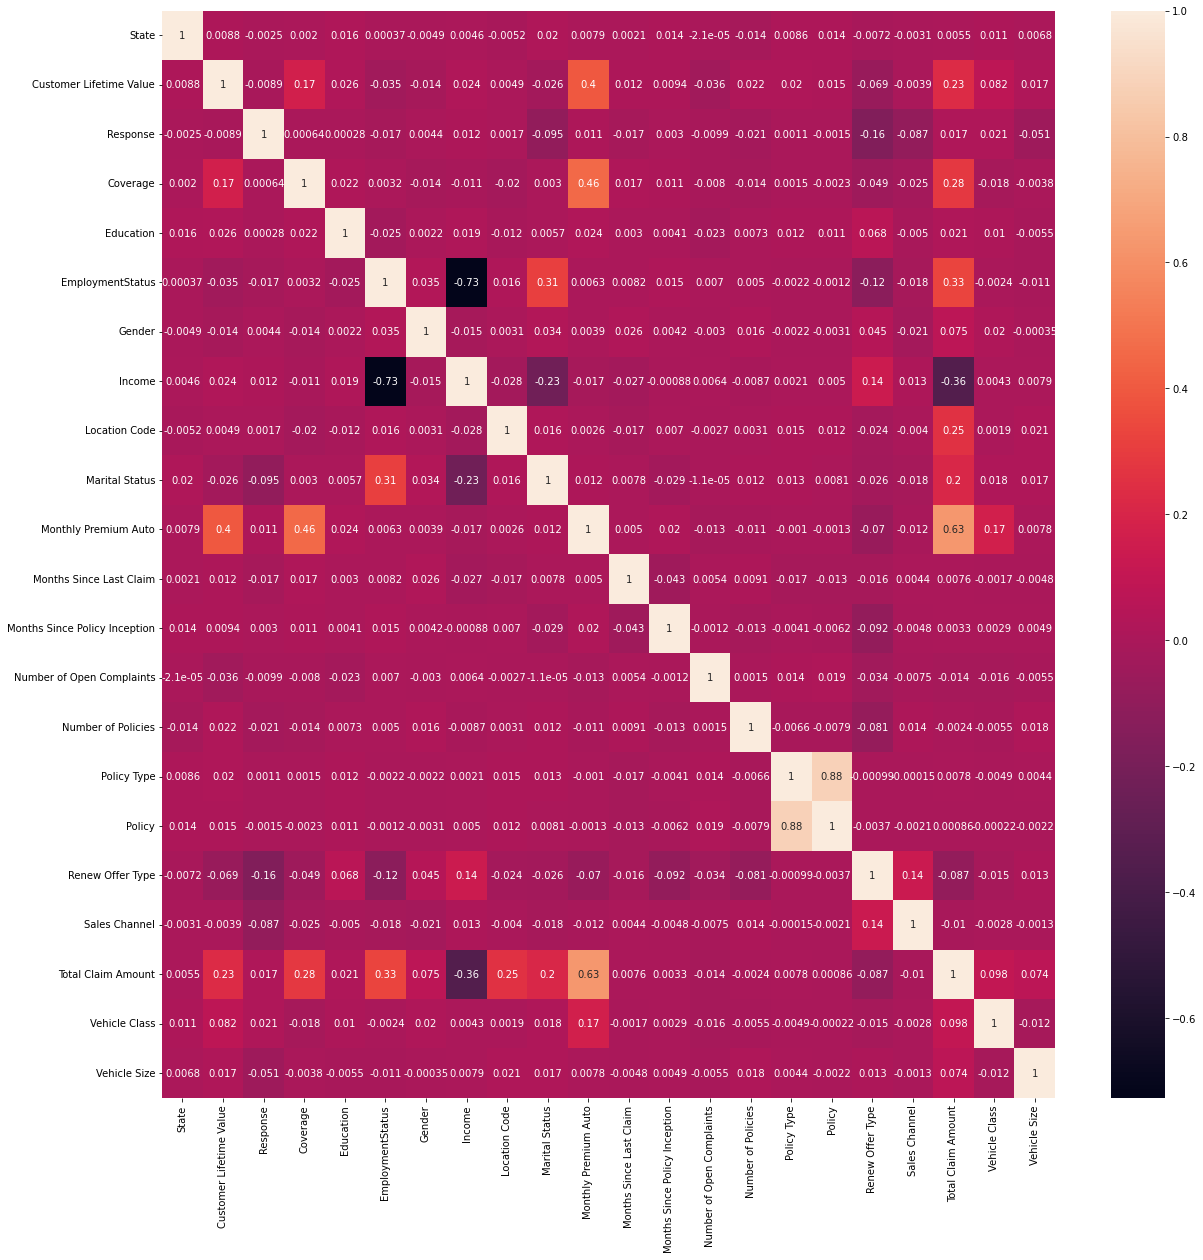

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# BASE MODEL

In [62]:
#Importing Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


#Importing Ensemble models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
dt = DecisionTreeRegressor()


abr = AdaBoostRegressor()
br = BaggingRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()


#Importing the Metrics for Score checking 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [63]:
#Spliting the DV and IDV

In [64]:
X = df.drop('Customer Lifetime Value',axis=1)
y = df['Customer Lifetime Value']

In [65]:
#Spliting the data for Train and Test the Models

In [66]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(6393, 24)
(2741, 24)
(2741,)
(6393,)


# 1. Linear Regression

In [68]:
#Fitting the Linear Regression Models
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Check the score of model and 
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

# Make predictions
predictions = lin_reg.predict(X_train)

print(f'Mean Squared_Error for Train: {mean_squared_error(y_train,predictions)}')
print(f'R^2 score for Train: {r2_score(y_train,predictions)}')





Coefficients: [-3.85516872e+01 -7.63683579e+02 -2.16773702e+02  1.50397087e+02
 -1.03136225e+02 -3.19816367e+01  4.15639835e-03 -3.71945324e+01
 -2.18296365e+02  7.78874736e+01  7.94691924e+00  2.55510783e+00
 -2.88968605e+02  6.11092291e+01  1.79231187e+02  3.90721159e+01
 -3.89459500e+02  9.58164982e+01 -2.61848387e-02  5.52992278e+01
  1.08196121e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Intercept: 520.3246976708815
R^2 score for train: 0.1681963201866039
R^2 score for test: 0.15411155333480375
Mean Squared_Error for Train: 37538904.55246068
R^2 score for Train: 0.1681963201866039


#### We can see not a good score in both Train and Test Dataset

# 2. Decision Tree Regression

In [69]:
#Fitting the Models
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#Check the score of model and 
print(f'R^2 score for train: {dt.score(X_train, y_train)}')
print(f'R^2 score for test: {dt.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 0.521667655300103


# 3. AdaBoostRegressor

In [70]:
#Fitting the Models
abr =AdaBoostRegressor()
abr.fit(X_train,y_train)

#Check the score of model and 
print(f'R^2 score for train: {abr.score(X_train, y_train)}')
print(f'R^2 score for test: {abr.score(X_test, y_test)}')


R^2 score for train: 0.0011211098471353154
R^2 score for test: 0.10788654145339205


# 4. Bagging Regressor

In [71]:
#Fitting the Models
br =BaggingRegressor()
br.fit(X_train,y_train)

#Check the score of model and 
print(f'R^2 score for train: {br.score(X_train, y_train)}')
print(f'R^2 score for test: {br.score(X_test, y_test)}')


R^2 score for train: 0.9429268408369278
R^2 score for test: 0.6933302530959066


# 5. Extra Trees Regressor

In [72]:
#Fitting the Models
etr =ExtraTreesRegressor()
etr.fit(X_train,y_train)

#Check the score of model and 
print(f'R^2 score for train: {etr.score(X_train, y_train)}')
print(f'R^2 score for test: {etr.score(X_test, y_test)}')


R^2 score for train: 1.0
R^2 score for test: 0.6971635665656128


# 6. Gradient Boosting Regressor

In [73]:
#Fitting the Models
gbr =GradientBoostingRegressor()
gbr.fit(X_train,y_train)

#Check the score of model and 
print(f'R^2 score for train: {gbr.score(X_train, y_train)}')
print(f'R^2 score for test: {gbr.score(X_test, y_test)}')

R^2 score for train: 0.7350168877086709
R^2 score for test: 0.6716872358180188


# 7. Random Forest Regressor

In [74]:
#Fitting the Models
rfr =RandomForestRegressor()
rfr.fit(X_train,y_train)

#Check the score of model and 
print(f'R^2 score for train: {rfr.score(X_train, y_train)}')
print(f'R^2 score for test: {rfr.score(X_test, y_test)}')

R^2 score for train: 0.9576544745827726
R^2 score for test: 0.7141868751519352


#### We can see not a good score in all the above Model for both Train and Test Dataset

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(6393, 301)

In [77]:
lin_reg.fit(X_train, y_train)
print(lin_reg.coef_[0])

-8.72648016979091e-07


In [78]:
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_train, y_train))

0.22459607933004855


In [79]:
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_test, y_test))

0.11765092343686456


#### We can see not a good score in all the above Model for both Train and Test Dataset

# Using GridSearchCV with Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(X_train, y_train)